# KMeans Clustering
## Achmad Alfansyah Nasution - 1301180006

## Import Library, Load Dataset, Clearing Data

In [1]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from numpy.linalg import norm

In [2]:
#load dataset
df = pd.read_csv('salju_test.csv') #memakai salah satu dataset yang akan di clustering, yatu salju_test.csv, upload dulu ya bro datasetnya

In [3]:
#Cek awalan datanya
df.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,...,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,...,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,...,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,...,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,...,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No


In [4]:
#drop dataset yang categorical karena clustering membutuhkan data yang numerik untuk dihitung jarak antar datanya
df.drop(['Tanggal','KodeLokasi','ArahAnginTerkencang','ArahAngin9am','ArahAngin3pm',
         'BersaljuHariIni','BersaljuBesok'], axis=1, inplace=True)

In [5]:
#Mengecek data yang terdapat null values
df.isna().sum()

SuhuMin                      165
SuhuMax                      165
Hujan                        387
Penguapan                   7856
SinarMatahari               8718
KecepatanAnginTerkencang    1274
KecepatanAngin9am            198
KecepatanAngin3pm            354
Kelembaban9am                330
Kelembaban3pm                548
Tekanan9am                  1865
Tekanan3pm                  1853
Awan9am                     7042
Awan3pm                     7456
Suhu9am                      219
Suhu3pm                      442
dtype: int64

In [6]:
#Mengisi data yang terdapat missing values dengan mean dari masing-masing variabel
df['SuhuMin'].fillna(value=df['SuhuMin'].mean(), inplace=True)
df['SuhuMax'].fillna(value=df['SuhuMax'].mean(), inplace=True)
df['Hujan'].fillna(value=df['Hujan'].mean(), inplace=True)
df['Penguapan'].fillna(value=df['Penguapan'].mean(), inplace=True)
df['SinarMatahari'].fillna(value=df['SinarMatahari'].mean(), inplace=True)
df['KecepatanAnginTerkencang'].fillna(value=df['KecepatanAnginTerkencang'].mean(), inplace=True)
df['KecepatanAngin9am'].fillna(value=df['KecepatanAngin9am'].mean(), inplace=True)
df['KecepatanAngin3pm'].fillna(value=df['KecepatanAngin3pm'].mean(), inplace=True)
df['Kelembaban9am'].fillna(value=df['Kelembaban9am'].mean(), inplace=True)
df['Kelembaban3pm'].fillna(value=df['Kelembaban3pm'].mean(), inplace=True)
df['Tekanan9am'].fillna(value=df['Tekanan9am'].mean(), inplace=True)
df['Tekanan3pm'].fillna(value=df['Tekanan3pm'].mean(), inplace=True)
df['Awan9am'].fillna(value=df['Awan9am'].mean(), inplace=True)
df['Awan3pm'].fillna(value=df['Awan3pm'].mean(), inplace=True)
df['Suhu9am'].fillna(value=df['Suhu9am'].mean(), inplace=True)
df['Suhu3pm'].fillna(value=df['Suhu3pm'].mean(), inplace=True)

In [7]:
#cek missing value yang tersisa
df.isna().sum()

SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
KecepatanAnginTerkencang    0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
dtype: int64

In [8]:
#Semua data sudah bertipe float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SuhuMin                   18182 non-null  float64
 1   SuhuMax                   18182 non-null  float64
 2   Hujan                     18182 non-null  float64
 3   Penguapan                 18182 non-null  float64
 4   SinarMatahari             18182 non-null  float64
 5   KecepatanAnginTerkencang  18182 non-null  float64
 6   KecepatanAngin9am         18182 non-null  float64
 7   KecepatanAngin3pm         18182 non-null  float64
 8   Kelembaban9am             18182 non-null  float64
 9   Kelembaban3pm             18182 non-null  float64
 10  Tekanan9am                18182 non-null  float64
 11  Tekanan3pm                18182 non-null  float64
 12  Awan9am                   18182 non-null  float64
 13  Awan3pm                   18182 non-null  float64
 14  Suhu9a

## Analisis Data

In [9]:
#Melihat kolerasi dari satu variabel ke variabel yang lain
df.corr()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
SuhuMin,1.000000,0.736220,0.099211,0.357387,0.045932,0.169255,0.176163,0.170409,-0.233412,-0.002248,-0.423427,-0.435137,0.066468,0.030871,0.897285,0.703054
SuhuMax,0.736220,1.000000,-0.076857,0.446379,0.325004,0.062942,0.016619,0.049250,-0.499999,-0.505629,-0.307480,-0.397067,-0.220762,-0.202990,0.877804,0.968470
Hujan,0.099211,-0.076857,1.000000,-0.051422,-0.177089,0.126937,0.086925,0.048447,0.224666,0.252782,-0.159237,-0.120135,0.176218,0.153953,0.007369,-0.081409
Penguapan,0.357387,0.446379,-0.051422,1.000000,0.291523,0.157626,0.148429,0.092409,-0.383867,-0.294390,-0.213731,-0.234269,-0.154236,-0.149899,0.422368,0.432701
SinarMatahari,0.045932,0.325004,-0.177089,0.291523,1.000000,-0.030615,0.003830,0.044540,-0.344211,-0.444702,0.036052,-0.009919,-0.529309,-0.558182,0.204460,0.343179
KecepatanAnginTerkencang,0.169255,0.062942,0.126937,0.157626,-0.030615,1.000000,0.572895,0.651558,-0.211548,-0.025312,-0.429201,-0.389070,0.059449,0.093251,0.147043,0.028611
KecepatanAngin9am,0.176163,0.016619,0.086925,0.148429,0.003830,0.572895,1.000000,0.518098,-0.260614,-0.021933,-0.225458,-0.176307,0.025436,0.057548,0.131428,0.004285
KecepatanAngin3pm,0.170409,0.049250,0.048447,0.092409,0.044540,0.651558,0.518098,1.000000,-0.151006,0.009262,-0.276414,-0.238221,0.044564,0.024446,0.161952,0.027698
Kelembaban9am,-0.233412,-0.499999,0.224666,-0.383867,-0.344211,-0.211548,-0.260614,-0.151006,1.000000,0.653860,0.142356,0.188299,0.347686,0.270790,-0.474016,-0.490592
Kelembaban3pm,-0.002248,-0.505629,0.252782,-0.294390,-0.444702,-0.025312,-0.021933,0.009262,0.653860,1.000000,-0.022076,0.052212,0.398233,0.408047,-0.222544,-0.561328


<AxesSubplot:>

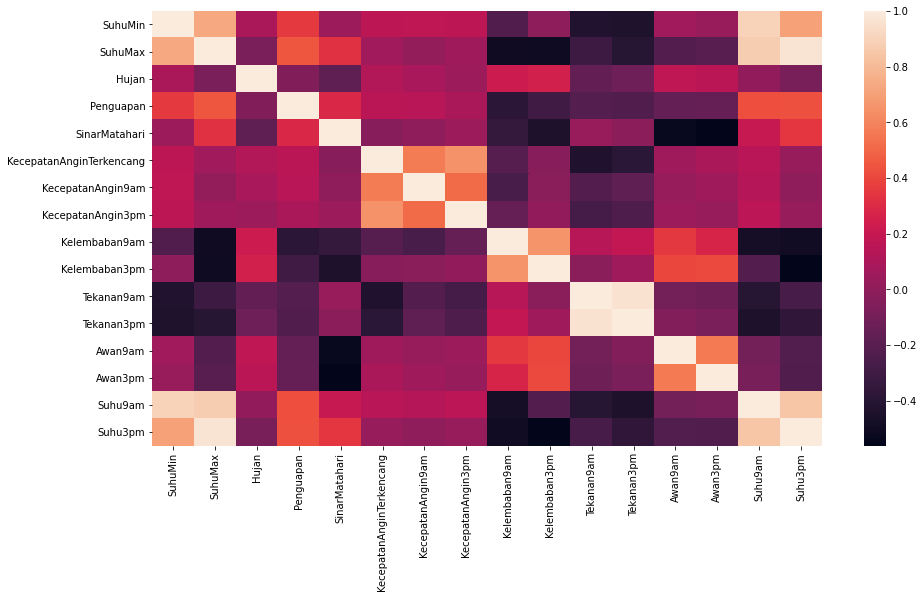

In [10]:
#Visualisasi Korelasinya, Makin terang warnanya, semakin mempunyai korelasi
plt.figure(figsize=(15,8))
sns.heatmap(df.corr())

In [11]:
"""
Karena Hujan, Penguapan, dan SinarMatahari tidak mempunyai korelasi yang kuat
dengan variabel lainnya maka kolom tersebut tidak digunakan untuk di clustering
"""
df.drop(['Hujan','Penguapan','SinarMatahari'], axis=1, inplace=True)

In [12]:
#Lihat lagi korelasinya
df.corr()

,SuhuMin,SuhuMax,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
SuhuMin,1.000000,0.736220,0.169255,0.176163,0.170409,-0.233412,-0.002248,-0.423427,-0.435137,0.066468,0.030871,0.897285,0.703054
SuhuMax,0.736220,1.000000,0.062942,0.016619,0.049250,-0.499999,-0.505629,-0.307480,-0.397067,-0.220762,-0.202990,0.877804,0.968470
KecepatanAnginTerkencang,0.169255,0.062942,1.000000,0.572895,0.651558,-0.211548,-0.025312,-0.429201,-0.389070,0.059449,0.093251,0.147043,0.028611
KecepatanAngin9am,0.176163,0.016619,0.572895,1.000000,0.518098,-0.260614,-0.021933,-0.225458,-0.176307,0.025436,0.057548,0.131428,0.004285
KecepatanAngin3pm,0.170409,0.049250,0.651558,0.518098,1.000000,-0.151006,0.009262,-0.276414,-0.238221,0.044564,0.024446,0.161952,0.027698
Kelembaban9am,-0.233412,-0.499999,-0.211548,-0.260614,-0.151006,1.000000,0.653860,0.142356,0.188299,0.347686,0.270790,-0.474016,-0.490592
Kelembaban3pm,-0.002248,-0.505629,-0.025312,-0.021933,0.009262,0.653860,1.000000,-0.022076,0.052212,0.398233,0.408047,-0.222544,-0.561328
Tekanan9am,-0.423427,-0.307480,-0.429201,-0.225458,-0.276414,0.142356,-0.022076,1.000000,0.960250,-0.103120,-0.124747,-0.398352,-0.265588
Tekanan3pm,-0.435137,-0.397067,-0.389070,-0.176307,-0.238221,0.188299,0.052212,0.960250,1.000000,-0.047885,-0.076632,-0.444915,-0.361987
Awan9am,0.066468,-0.220762,0.059449,0.025436,0.044564,0.347686,0.398233,-0.103120,-0.047885,1.000000,0.563187,-0.103661,-0.226051


## Cluster berdasarkan suhu karena memiliki nilai korelasi antar variabel SuhuMin, SuhuMax, Suhu9am, Suhu3pm bernilai besar. Kemudian dilakukan MinMax Scaler agar perhitungan jarak antar data dan centroid

In [13]:
data = df[['SuhuMin','SuhuMax','Suhu9am','Suhu3pm']] #Memakai Data yang akan dipakai untuk clustering
data_idx = data.index
scale = MinMaxScaler() #Scale dengan MinMax Scaler
data_scale = scale.fit_transform(data)
data_scale

array([[0.47692308, 0.59288538, 0.72027972, 0.54819277],
       [0.45128205, 0.44268775, 0.37062937, 0.45381526],
       [0.43076923, 0.58695652, 0.44522145, 0.60240964],
       ...,
       [0.36666667, 0.50197628, 0.3962704 , 0.51606426],
       [0.51538462, 0.5770751 , 0.65501166, 0.58433735],
       [0.51025641, 0.36363636, 0.44289044, 0.38353414]])

In [14]:
#Mengisi Kembali nilai yang sudah di scale ke dalam dataFrame
df_cluster = pd.DataFrame(data = data_scale[:,:], columns=['SuhuMin','SuhuMax','Suhu9am','Suhu3pm'])
df_cluster = df_cluster.set_index(data_idx)
df_cluster

,SuhuMin,SuhuMax,Suhu9am,Suhu3pm
0,0.476923,0.592885,0.720280,0.548193
1,0.451282,0.442688,0.370629,0.453815
2,0.430769,0.586957,0.445221,0.602410
3,0.648718,0.583004,0.641026,0.604418
4,0.253846,0.205534,0.223776,0.194779
...,...,...,...,...
18177,0.394872,0.559289,0.512821,0.556225
18178,0.512821,0.575099,0.519814,0.590361
18179,0.366667,0.501976,0.396270,0.516064
18180,0.515385,0.577075,0.655012,0.584337


## Menggunakan metode PCA untuk mereduksi dimensi dari suatu data, agar dapat mempermudah dan mempercepat proses clustering dan juga tentunya divisualisasikan.

In [15]:
pca = PCA(n_components=2) #Memakai Principle Component Analysis untuk merubah data menjadi 2 dimensi
principal = pca.fit_transform(df_cluster)
df_pca = pd.DataFrame(data=principal, columns=['pca1','pca2'])
df_pca

,pca1,pca2
0,-0.145672,0.047807
1,0.166966,0.002444
2,0.001849,0.148908
3,-0.216837,-0.035422
4,0.581507,-0.080045
...,...,...
18177,0.019778,0.126698
18178,-0.070136,0.067932
18179,0.141939,0.117504
18180,-0.140894,0.042736


In [21]:
#Data Yang sudah di clean, sudah diolah
df_pca.to_csv('1301180006_AchmadAlfansyahNasution.csv', index=False)

## KMeans Class

In [16]:
class Kmeans:

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    #Inisialisasi Centroids secara Random
    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    #Menghitung rata-rata
    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    #Menghitung Jarak
    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    #Menghitung Sum of Square
    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    #Fit Data
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        return self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)
        return self.find_closest_cluster(distance)

In [17]:
z = df_pca.values 
K = 3
km = Kmeans(n_clusters=K, max_iter=100) #Modelling data dengan KMeans
km.fit(z)
centroids = km.centroids

## Visualisasi

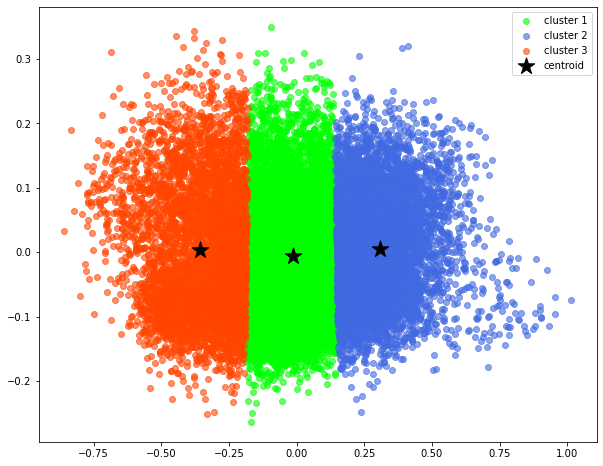

In [18]:
#Plotiing data yang sudah di clustering untuk di visualisasi

fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(z[km.labels == 0, 0], z[km.labels == 0, 1],
            c='lime', label='cluster 1', alpha=0.6)
plt.scatter(z[km.labels == 1, 0], z[km.labels == 1, 1],
            c='royalblue', label='cluster 2', alpha=0.6)
plt.scatter(z[km.labels == 2, 0], z[km.labels == 2, 1],
            c='orangered', label='cluster 3', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='black', label='centroid')
plt.legend()

In [19]:
sse = []
K = range(1,10)
for k in K:
    kmeanModel = Kmeans(n_clusters=k)
    sse.append(kmeanModel.fit(z))

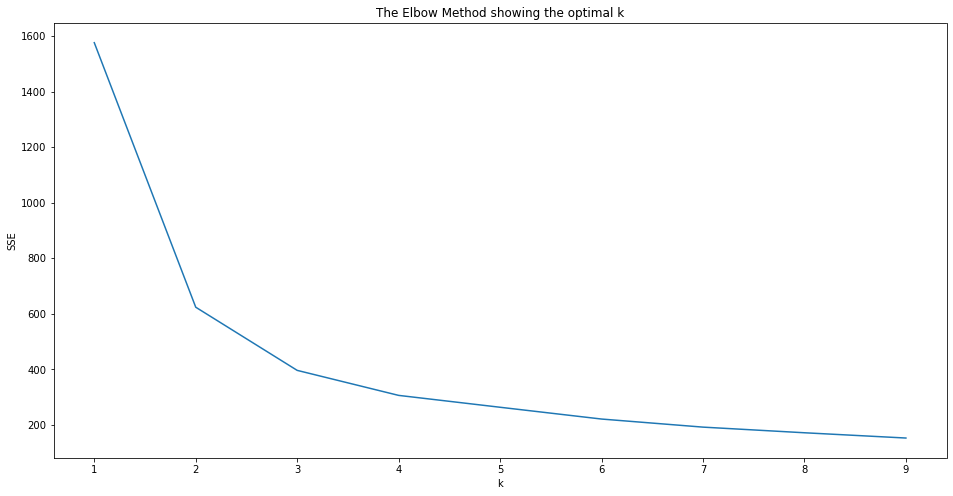

In [20]:
plt.figure(figsize=(16,8))
plt.plot(K, sse)
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()